# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [6]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      
      # generate age values uniformly distributed between age_lo and age_hi
      age <- runif(sample_size, min = age_lo, max = age_hi)

      # generate reading experience based on the model
      # x = β_xa * a + β_x0 + ε_x
      epsilon_x <- rnorm(sample_size, mean = 0, sd = sd_x)
      x <- beta_xa * age + beta_x0 + epsilon_x

      # generate comprehension experience based on the model
      # c = β_ca * a + β_cx * x + β_c0 + ε_c
      epsilon_c <- rnorm(sample_size, mean = 0, sd = sd_c)
      c <- beta_ca * age + beta_cx * x + beta_c0 + epsilon_c

      # dataframe with simulated variables
      data.frame(age = age, x = x, c = c)

}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,157.4724,85.17673,287.03809
2,141.3883,62.92829,316.72725
3,130.0304,73.24038,371.87149
4,141.5770,-20.23156,26.82014
5,111.4584,24.32035,234.52226
6,193.6174,162.88876,743.47647


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [7]:
library(tidyverse)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x dplyr::select() masks MASS::select()
x tidyr::unpack() masks Matrix::unpack()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


a) Plot the relationship between age and reading comprehension.

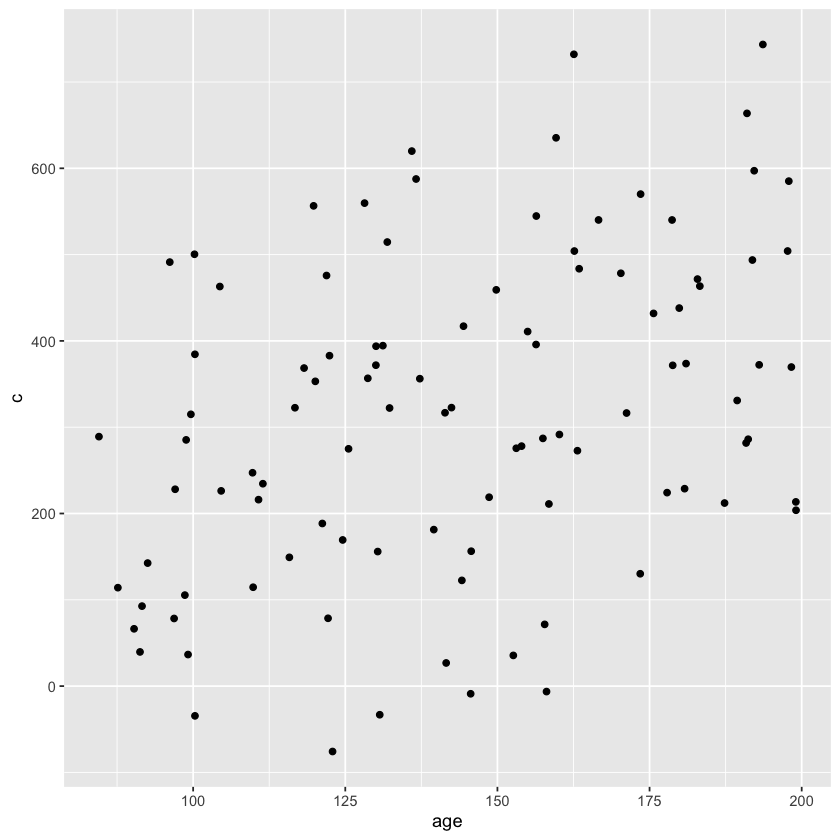

In [8]:
# plot the relationship between age and reading comprehension
ggplot(dat, aes(x = age, y = c)) +
geom_point()


b) Plot the relationship between reading experience, age, and reading comprehension.

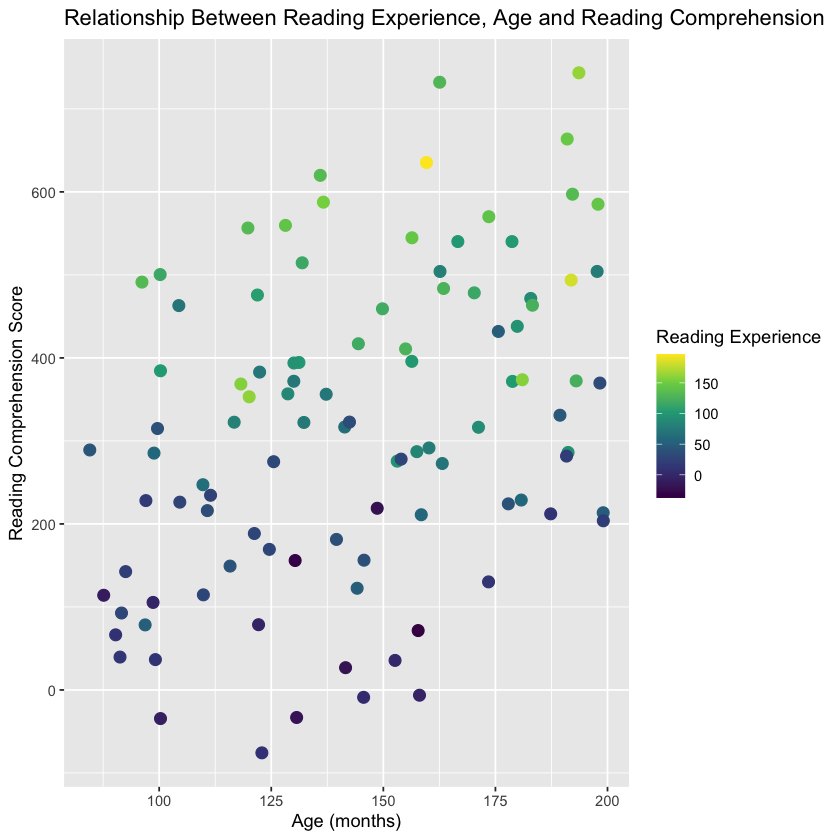

In [9]:
# plot the relationship between reading experience, age and reading comprehension
ggplot(data = dat, aes(x = age, y = c, color = x)) +
geom_point(size = 3) +
scale_color_viridis_c() +  # Continuous color scale
labs(
    title = "Relationship Between Reading Experience, Age and Reading Comprehension",
    x = "Age (months)",
    y = "Reading Comprehension Score",
    color = "Reading Experience" 
)


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [10]:
install.packages("mediation")
library(mediation)

# Note to Larry and Roberto: I had trouble with this package install and 
# figured out that a previously installed conda environment (for psychopy) 
# was interferring with my R-Kernal install for VSCode and this work. 
# That's why the other package wouldn't install a couple weeks ago. 
# I've uninstalled conda and reconfigured the path; should be in the clear now! 
# Just FYI. 





The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpPK7CVZ/downloaded_packages


Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [15]:
# Fit the mediator model (age -> x)
mediation_model <- lm(x ~ age, data = dat)
summary(mediation_model)

# Fit the outcome model (age + x -> c)
outcome_model <- lm(c ~ age, data = dat)
summary(outcome_model)

# Fit the outcome model with both predictor and mediator (age + x -> c)
outcome_model_2 <- lm(c ~ age + x, data = dat)
summary(outcome_model_2)

# use mediate function to test the mediation
library(mediation)
med_results <- mediate(mediation_model, outcome_model_2, treat = "age", mediator = "x", boot = TRUE, sims = 1000)
summary(med_results)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-113.850  -33.391    0.962   38.006  119.329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -4.4287    23.3432  -0.190  0.84992   
age           0.5126     0.1584   3.237  0.00165 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.02 on 98 degrees of freedom
Multiple R-squared:  0.09661,	Adjusted R-squared:  0.08739 
F-statistic: 10.48 on 1 and 98 DF,  p-value: 0.001647



Call:
lm(formula = c ~ age, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-352.7 -128.8    1.6  107.7  376.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.5154    77.1523   0.084    0.933    
age           2.1502     0.5234   4.108 8.27e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 171.9 on 98 degrees of freedom
Multiple R-squared:  0.1469,	Adjusted R-squared:  0.1382 
F-statistic: 16.88 on 1 and 98 DF,  p-value: 8.27e-05



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-217.476  -65.716    6.057   67.497  233.367 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8463    41.7911   0.451   0.6530    
age           0.7229     0.2982   2.424   0.0172 *  
x             2.7844     0.1808  15.399   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 93.11 on 97 degrees of freedom
Multiple R-squared:  0.7523,	Adjusted R-squared:  0.7472 
F-statistic: 147.3 on 2 and 97 DF,  p-value: < 2.2e-16


Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.427        0.572         2.26   0.002 ** 
ADE               0.723        0.145         1.29   0.014 *  
Total Effect      2.150        1.152         3.04  <2e-16 ***
Prop. Mediated    0.664        0.407         0.91   0.002 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> *The first analysis is looking at age as a mediating factor related to reading experience and, with a p-value of 0.00165, there is a significant positive relationship. The second analysis is looking at age as a mediating factor as related to reading comprehension, which has an exceptionally small p-value, again showing a significant positive relationship. The third analysis is looking at comprehension as compared to the interactive reading experience and age, both of which are significant, but moreso for the reading experience. Finally, the mediation analysis gives us four level to review. ACME is the indirect effect of age on comprehension through through experience and it shows it does, with a p-value of 0.002. ADE is the average direct effect of age on reading comprehension when controlling for experience which has a p-value of 0.014. The total effect is the combined direct and indirect, which has a highly significant p-value of <2e-16 and, finally, the proportional mediated has a p-value of 0.002 and means about 66% of the effect of age on reading comprehension is explained by reading experience.*

> *Why these results? is an interesting question. There are so many factors that go into reading and I'm surprised the proportional mediated results weren't explained at a higher rate than these, showing there are other critical factors. Reading experience and age go hand in hand, but when age increases and reading experience doesn't keep pace there can be self-reinforcing consequences that affect reading comprehension such as limiting vocabulary, spoken and reading, and perhaps also influencing relationships. These results seem to be an important piece of the puzzle but there are more factors to consider.*
>

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Coding with my tutor, claude.ai*